In [1]:
# I have some data points X and the corresponding labels y (0 or 1)

# X is a continous data with each data point being a 2 dimensional vector

In [2]:
import numpy as np

In [22]:
np.random.seed(32)
x = np.random.rand(2)

In [64]:
X = np.random.rand(100, 1)
y = np.random.randint(2, size=100)

In [65]:
X[0]

array([0.15970447])

In [66]:
n = len(X) # length of dataset

In [67]:
dataset = [(X[i], y[i]) for i in range(n)]

In [68]:
import matplotlib.pyplot as plt

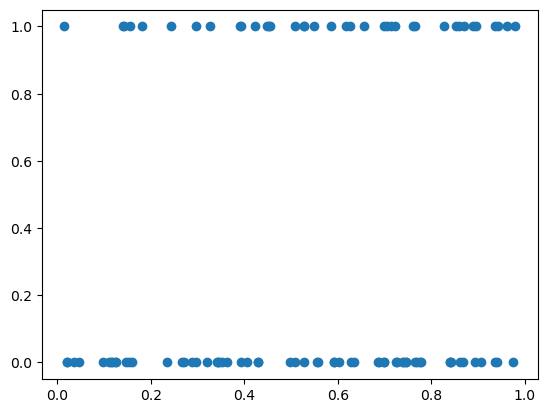

In [72]:
plt.scatter(X, y)

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    

In [74]:
X.shape

(100, 1)

In [75]:
np.zeros(1).shape

(1,)

In [76]:
def fit(X, y, lr=0.01, epochs=100, lambda_penalty=0.0001):
    n, p = X.shape
    W = np.zeros(p)
    for _ in range(epochs):
        z = X @ W
        pred = sigmoid(z)
        
        # loss = y * np.log(pred) + (1-y) * np.log(1-pred) + lambda_penalty * W
        
        grad = (X.T @ (pred-y)) / n + lambda_penalty * W
        
        W -= grad * lr
    return W
        
        

In [77]:
def predict_proba(X, W):
    return sigmoid(X @ W)

In [87]:
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[81:], y[81:]

(100,)

In [ ]:
X_train = train[0]